### Yolov8 training on Custom data

##### Live object detection

In [ ]:
!pip install ultralytics
import cv2
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model.
model = YOLO('yolov8n.pt')

# Initialize the webcam (0 is the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Check if the frame is captured successfully
    if not ret:
        break

    # Perform inference on the frame
    results = model(frame)

    # Get the results and visualize # USE FOR BOX ON THE SCREEN
    for result in results:
        # Loop through each detected object
        for box in result.boxes:
            # Get bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            # Get the label of the detected object
            label = result.names[int(box.cls)]
            # Draw bounding box and label on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f'{label}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('YOLOv8 Live Detection', frame)

    # Break the loop if 'q' or 'ESC' key is pressed
    if cv2.waitKey(30) in [27, ord('q')]:
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

100%|██████████| 6.25M/6.25M [00:00<00:00, 55.0MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()
os.listdir('drive/MyDrive/Yolov8/data/train/images')

['000030_jpg.rf.B5YwzhQ2wsTX0znpLeVE.jpg',
 '000075_jpg.rf.RZEDsRNuUm5lTnLiWEwe.jpg',
 '000001_jpg.rf.f0Hs0vgzRuLAvfYuJPJC.jpg',
 '000066_jpg.rf.eFdP7wZDTNx99Kr2s5a7.jpg',
 '000001_jpg.rf.PfnGNMDAF20eM9Ji79ix.jpg',
 '000087_jpg.rf.QiKL0STz1QXpQoieVN1i.jpg',
 '000090_jpg.rf.EhkXaP1FCq1J9n0XfnlS.jpg',
 '000030_jpg.rf.sHogZxUVYtp92pPd4aRI.jpg',
 '000053_jpg.rf.DpeFtxMEUgRiFlS4TOnD.jpg',
 '000013_jpg.rf.GGcUobokEb0XnklUbHOq.jpg',
 '000024_jpg.rf.JiqtwMmigqYWS9XShyf6.jpg',
 '000041_jpg.rf.uJnlt55Q13aaglV29MrE.jpg',
 '000020_jpg.rf.dnt0JiSAoKzhsv0OO3Gm.jpg',
 '000026_jpg.rf.KA6Z9qgVLl5yx8gaALE1.jpg',
 '000068_jpg.rf.gSWfUv7Ee0C0IX0MOHqu.jpg',
 '000058_jpg.rf.SDAICWmXwbyEa7HWe0QZ.jpg',
 '000022_jpg.rf.yB7OUtKpOE1h4YuCPh01.jpg',
 '000012_jpg.rf.oenvnRTfCyP3WIoVIQ7j.jpg',
 '000074_jpg.rf.KzyvTHdRe62fn6y3uOz1.jpg',
 '000044_jpg.rf.vLJ4s4ivTdEzRGgK1snT.jpg',
 '000077_jpg.rf.oEHNo7owLzKz6LLKJVAo.jpg',
 '000019_jpg.rf.kO7fZTukOk5NgV7L95os.jpg',
 '000080_jpg.rf.jkdbncKb0kA2Z0mkfIAa.jpg',
 '000090_jp

In [ ]:
# Verify paths
data_path = '/content/drive/MyDrive/Yolov8/data.yaml'
model_path = '/content/drive/MyDrive/Yolov8/yolov8n.pt'

# Print paths to check
print(f"Data path: {data_path}")
print(f"Model path: {model_path}")

# Load and test the model
model = YOLO(model_path)

# Test dataset loading
try:
    data = YOLO.load_data(data_path)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Training
results = model.train(
   data=data_path,
   imgsz=640,
   epochs=10,
   batch=8,
   name='yolov8n_custom'
)

Data path: /content/drive/MyDrive/Yolov8/data.yaml
Model path: /content/drive/MyDrive/Yolov8/yolov8n.pt
Error loading dataset: type object 'YOLO' has no attribute 'load_data'
Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Yolov8/yolov8n.pt, data=/content/drive/MyDrive/Yolov8/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=F

100%|██████████| 755k/755k [00:00<00:00, 11.1MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Yolov8/data/train/labels... 210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 210/210 [01:09<00:00,  3.02it/s]

train: New cache created: /content/drive/MyDrive/Yolov8/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Yolov8/data/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:13<00:00,  1.47it/s]

val: New cache created: /content/drive/MyDrive/Yolov8/data/valid/labels.cache


Plotting labels to runs/detect/yolov8n_custom3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/yolov8n_custom3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.033      3.573      1.806          8        640: 100%|██████████| 27/27 [03:03<00:00,  6.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.61s/it]

                   all         20         65     0.0075      0.767      0.116      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.651       2.42      1.472          2        640: 100%|██████████| 27/27 [02:56<00:00,  6.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.95s/it]

                   all         20         65      0.906     0.0296      0.306      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.585      2.134      1.435         13        640: 100%|██████████| 27/27 [02:59<00:00,  6.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.31s/it]

                   all         20         65      0.746      0.326      0.369      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G       1.52      2.098      1.416          2        640: 100%|██████████| 27/27 [02:50<00:00,  6.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.12s/it]

                   all         20         65      0.673      0.425      0.396      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.513      1.938      1.411          3        640: 100%|██████████| 27/27 [02:52<00:00,  6.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.37s/it]

                   all         20         65      0.652      0.396      0.425      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.472       1.71      1.342          5        640: 100%|██████████| 27/27 [02:48<00:00,  6.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.82s/it]

                   all         20         65       0.47      0.463        0.5      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.362      1.571      1.296          7        640: 100%|██████████| 27/27 [02:53<00:00,  6.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.29s/it]

                   all         20         65      0.615      0.448      0.551      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.345      1.529      1.303         14        640: 100%|██████████| 27/27 [02:51<00:00,  6.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.70s/it]

                   all         20         65      0.508      0.483      0.521      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.343      1.447      1.293          7        640: 100%|██████████| 27/27 [02:49<00:00,  6.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.43s/it]

                   all         20         65       0.87      0.548      0.605      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.326      1.384      1.264          7        640: 100%|██████████| 27/27 [02:50<00:00,  6.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.24s/it]

                   all         20         65       0.93      0.515      0.604      0.286



10 epochs completed in 0.510 hours.
Optimizer stripped from runs/detect/yolov8n_custom3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_custom3/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_custom3/weights/best.pt...
Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.98s/it]


                   all         20         65      0.869      0.548      0.605      0.306
                  head          3         18      0.741      0.778       0.84      0.418
                helmet         17         45      0.867      0.867      0.936      0.481
                person          1          2          1          0     0.0385     0.0176
Speed: 2.8ms preprocess, 264.2ms inference, 0.0ms loss, 11.9ms postprocess per image
Results saved to runs/detect/yolov8n_custom3


In [ ]:
from IPython.display import Image #this is to render predictions

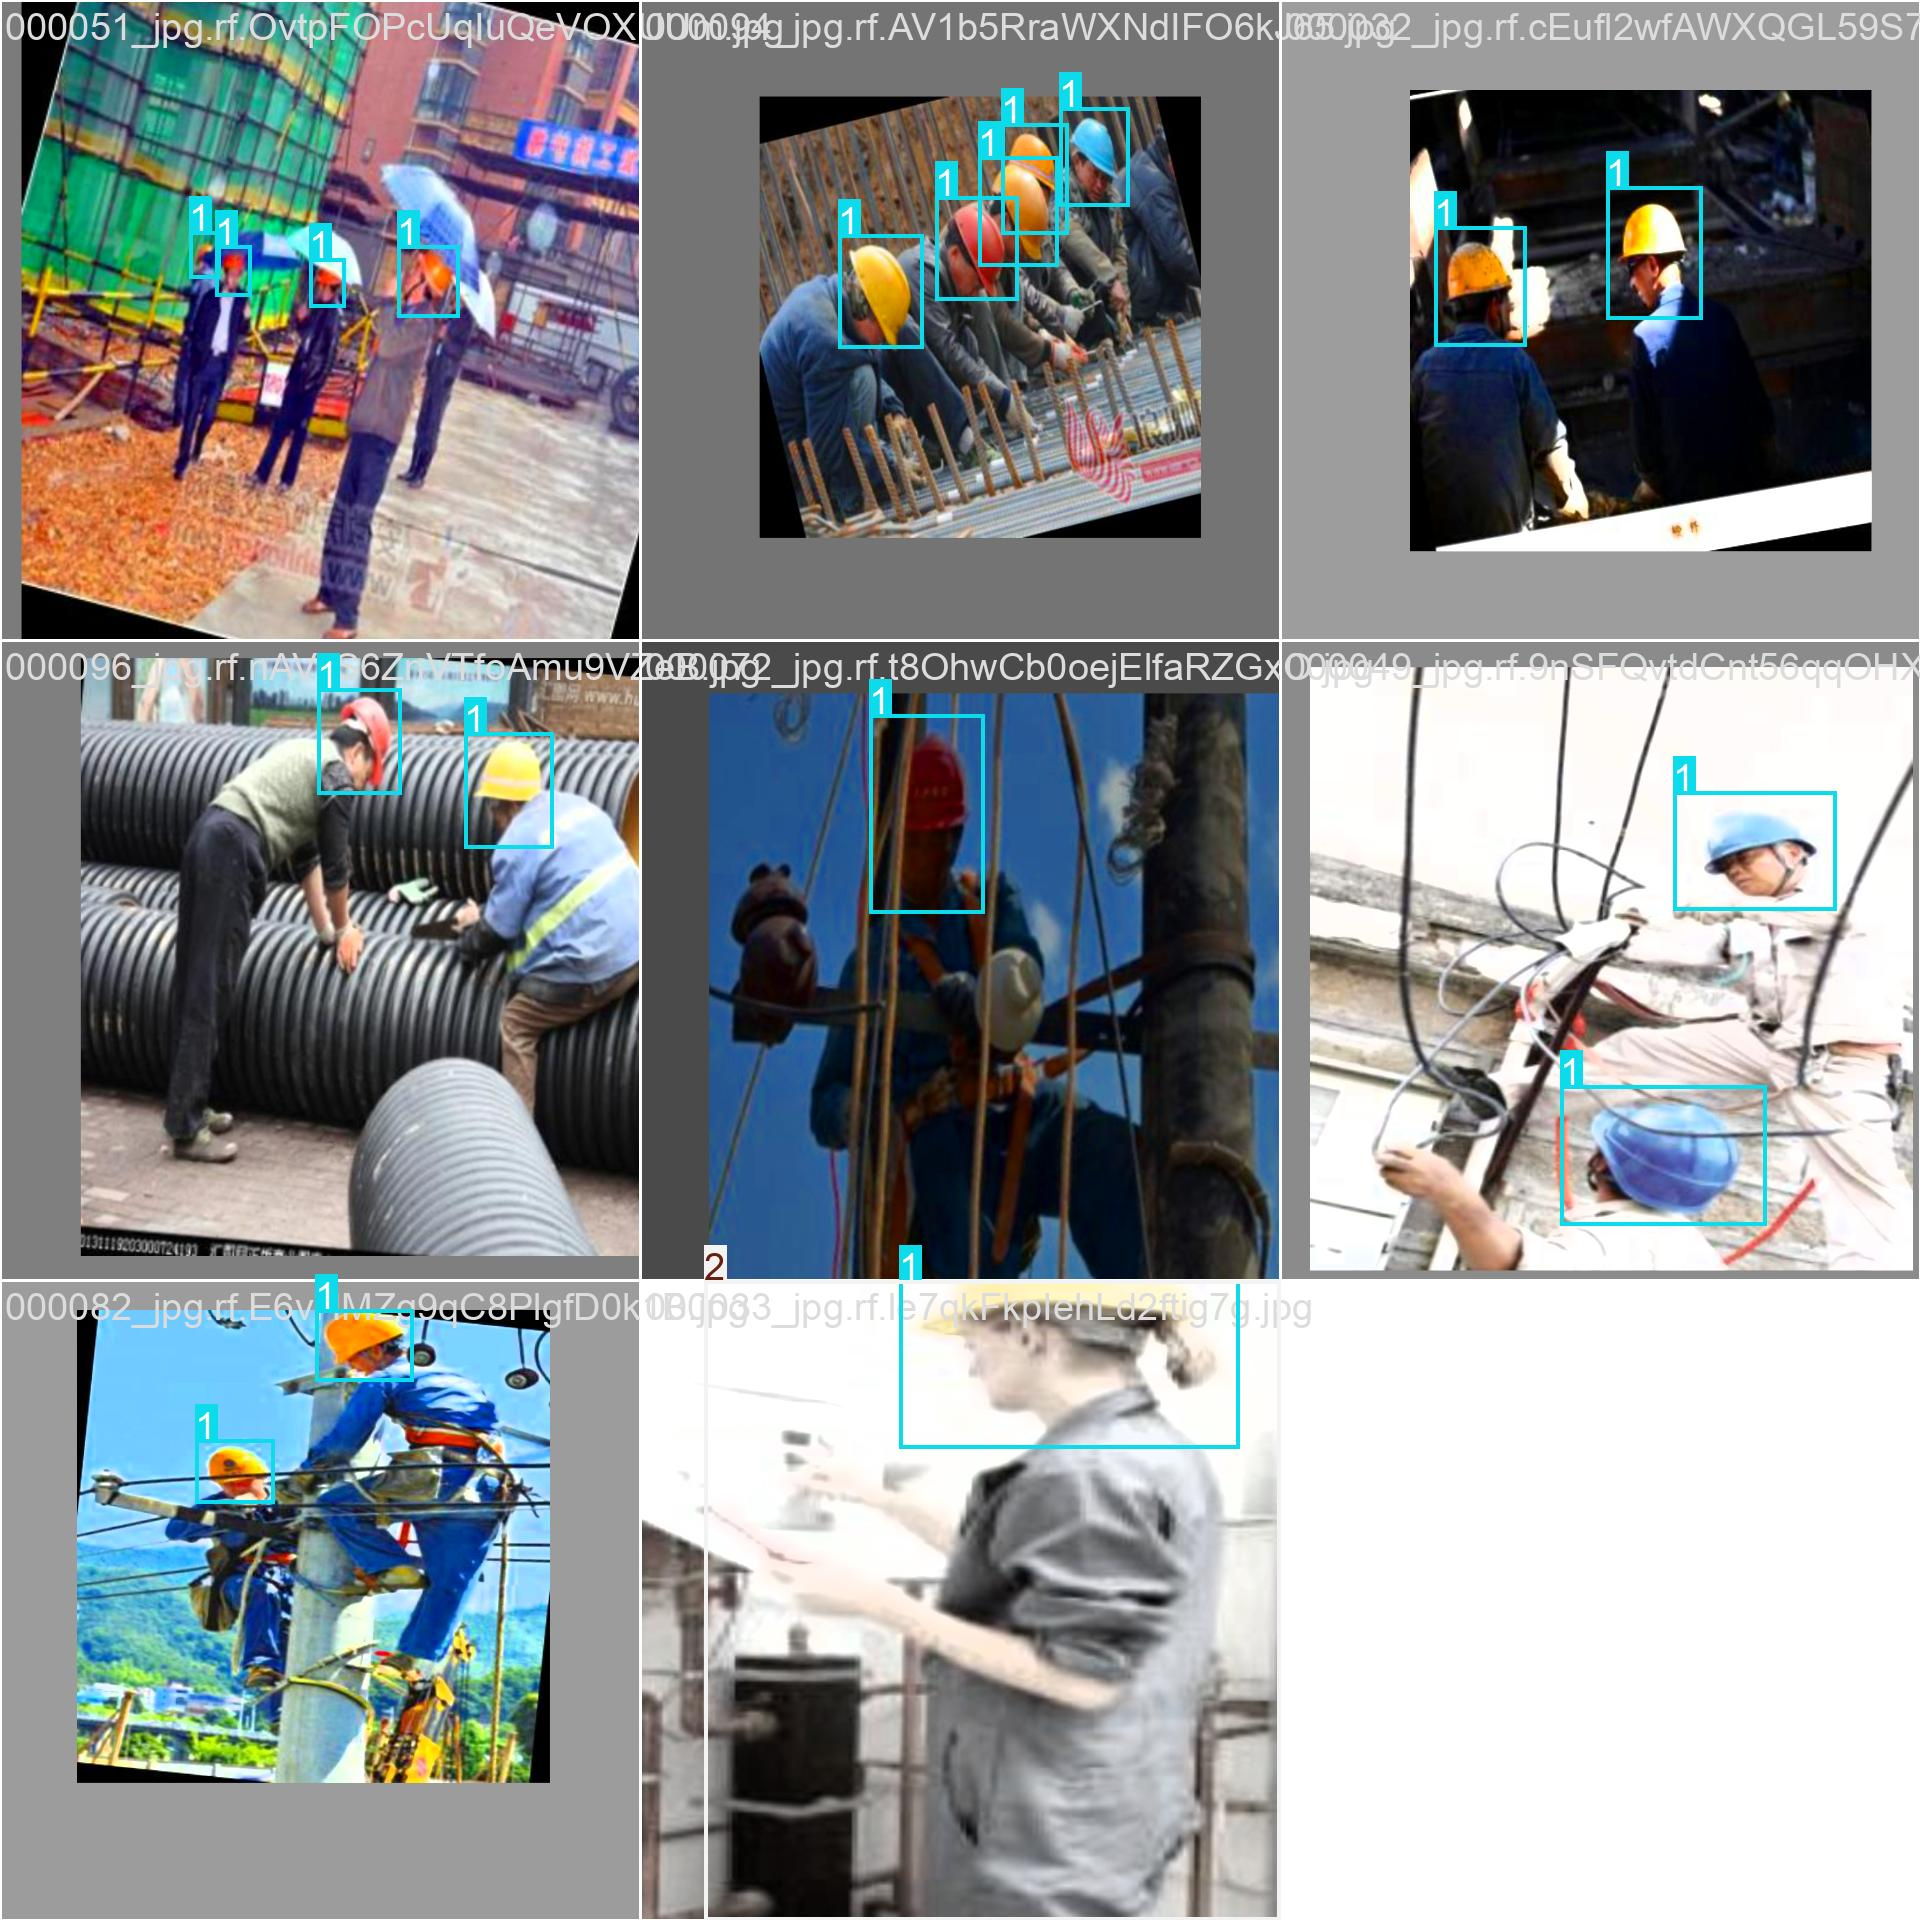

In [ ]:
Image(filename='runs/detect/yolov8n_custom3/train_batch0.jpg', width=1000)

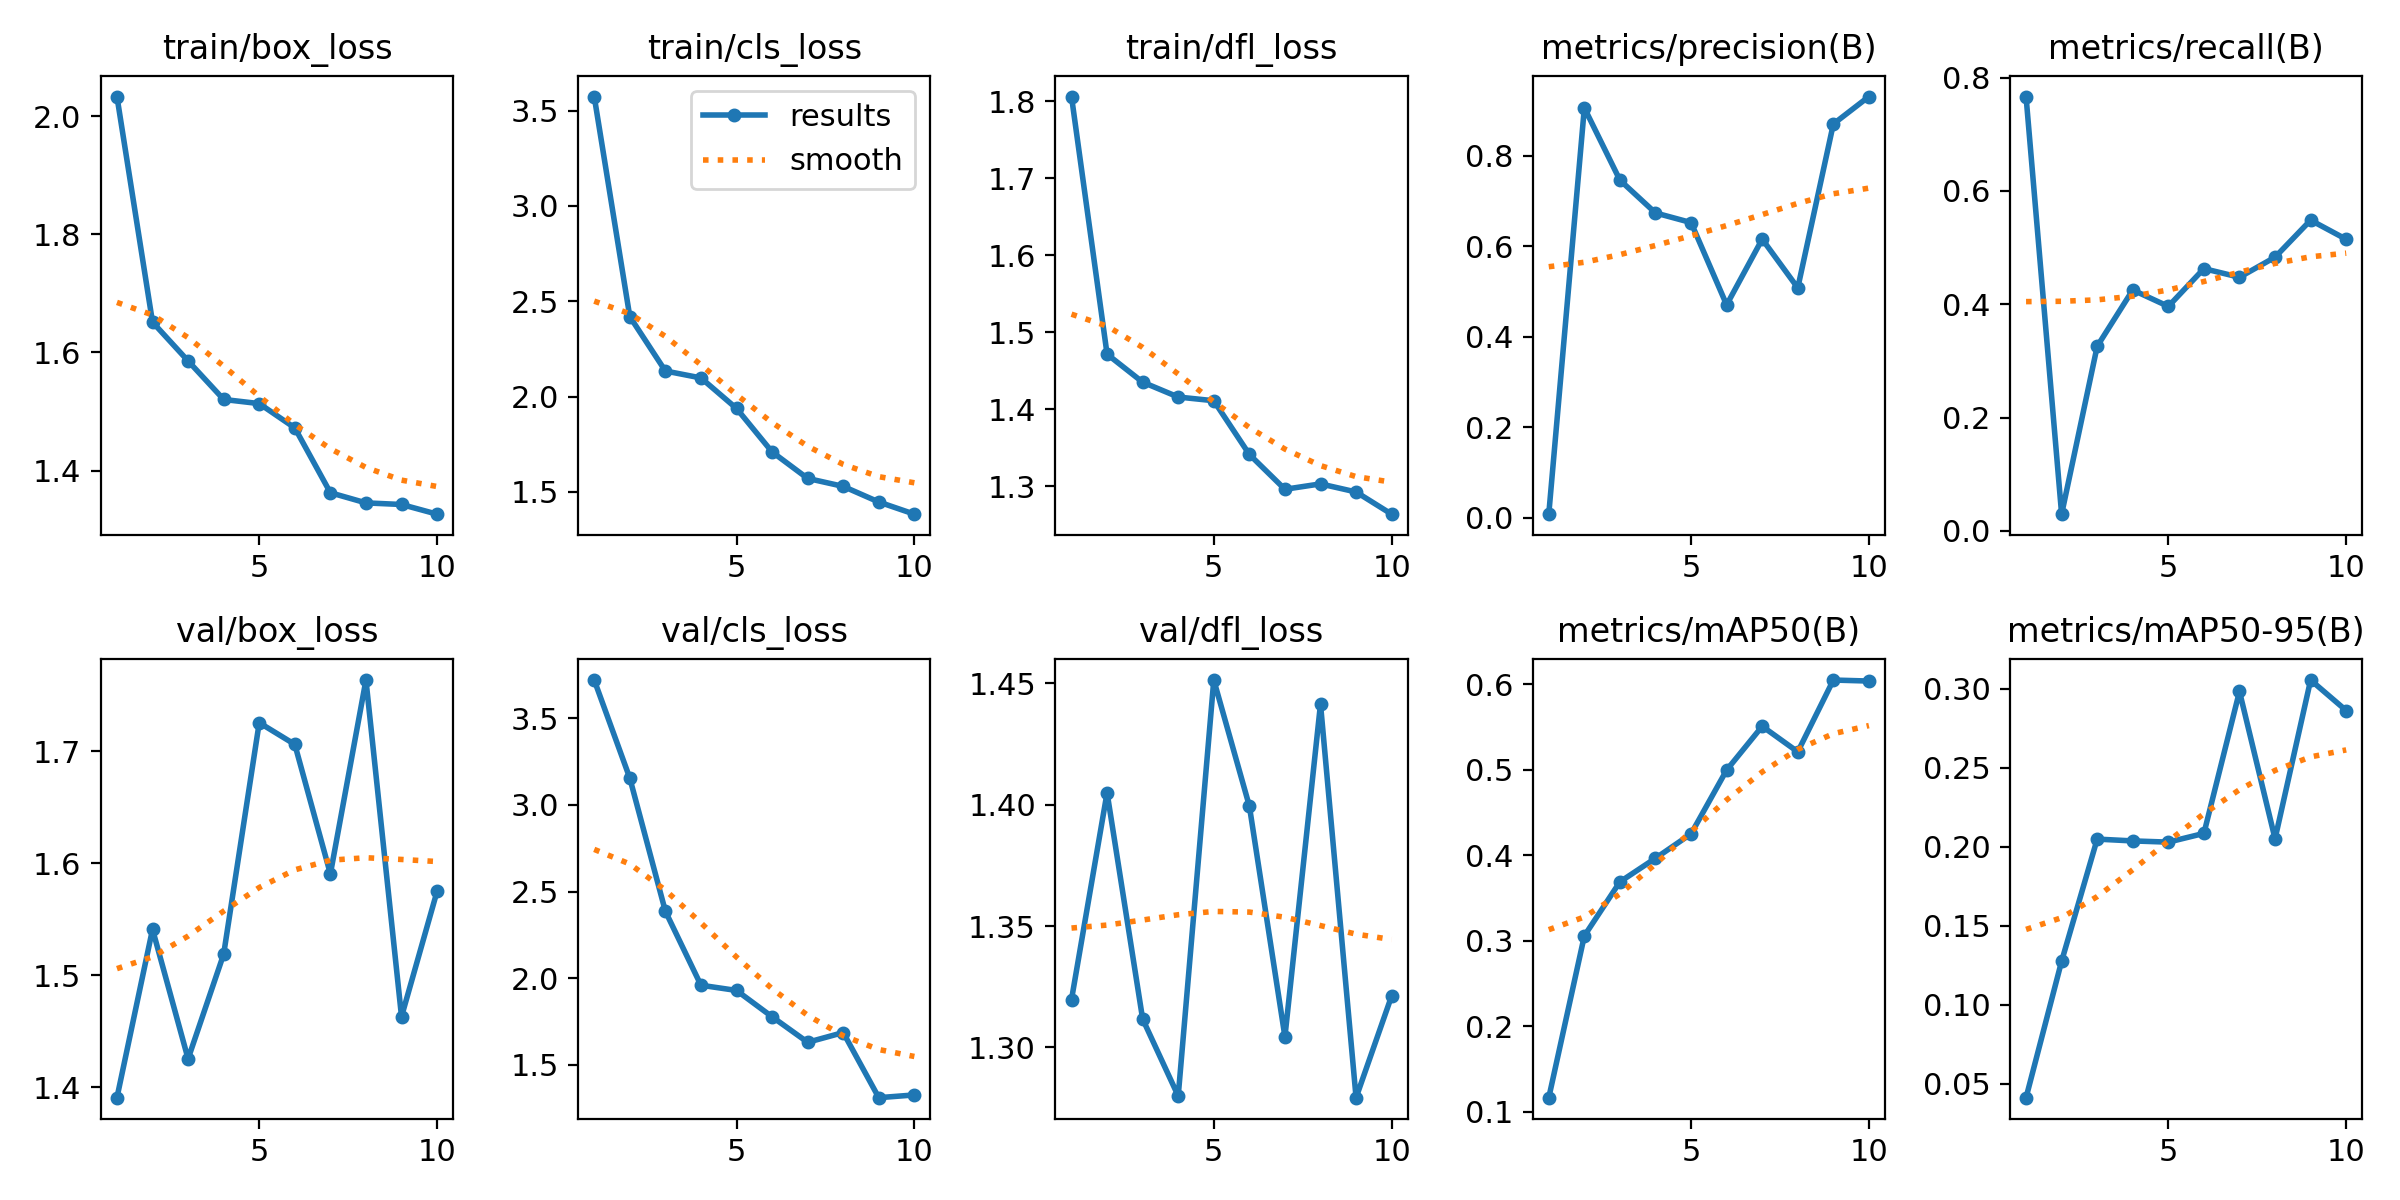

In [ ]:
Image(filename='runs/detect/yolov8n_custom3/results.png', width=1000)